# Fonction et dérivation

In [ ]:
# Import des Modules python 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
Ecrire un script qui affiche la courbe représentative du polynome vu en cours $P(X)=1-x^2+x^3$.  
L'intervalle de définition sera $[-0.2,1.4]$ que vous échantillonerez avec un nombre de points à votre convenance.


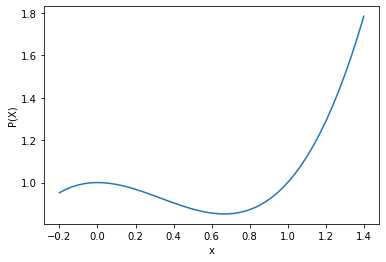

In [4]:
# Set linear space for x variable
x = np.linspace(-0.2,1.4)

# Define polynomial function
def P(x):

    return  1- x**2 + x**3

# Plot function

plt.figure()
plt.ylabel("P(X)")
plt.xlabel("x")
plt.plot(x,P(x))
plt.show()

## Question 2
Ecrire un script qui affiche la courbe du polynome $P$ et de sa tangente au point $(1,P(1))$.  
Vous utiliserez deux couleurs.

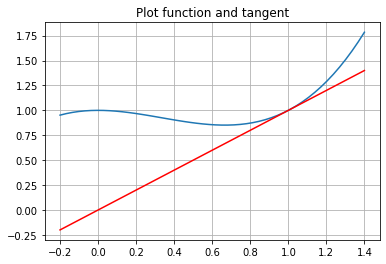

In [5]:
# Define derivative function in non-analytic way
def deriv(f,x,h=0.000000001 ): 
    return (f(x+h) - f(x))/h

# Define tangent line function
def tangent_line(f,x_0,x,h=0.000000001):
    y = f(x) 
    y_0 = f(x_0)
    return deriv(f,x_0,h) * (x - x_0) + y_0

# Plot function and tangent
plt.title('Plot function and tangent')
plt.plot(x,P(x))
plt.plot(x,tangent_line(P,1,x),'r')
plt.grid()
plt.show()

## Question 3
Ecrire deux fonctions python pour $P$ et sa dérivée $P'$.  
Vous utiliserez au choix le spécificateur "def" ou une fonction lambda (plus d'informations ici https://fr.wikibooks.org/wiki/Programmation_Python/Fonctions)


In [8]:
# Define function derivative in non-analytic way

def Pder(x):
    return -2*x+ 3* x**2

## Question 4
Ecrire un script qui montre la courbe de $P$ et plusieurs droites passant par les points $(x_0,P(x_0))$ et $(x_0+h,P(x_0+h))$ pour plusieurs valeurs de $h$ (pas trop nombreuses non plus pour garder une certaine visibilité).  
Montrer aussi la tangente à $P$ au point $(x_0,P(x_0))$. Que pouvez vous en conclure ?  
Vous commencerez avec $x_0=1$ comme en cours et essaierez d'autres valeurs.

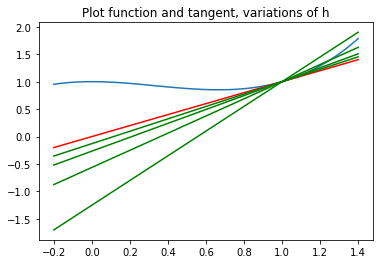

In [6]:
# Set error
h=0.5

# Plot tangent line for various errors
plt.figure()
plt.title('Plot function and tangent, variations of h')
plt.plot(x,P(x))
plt.plot(x,tangent_line(P,1,x),'r')
for i in range(1,5):
    plt.plot(x,tangent_line(P,1,x,h),'g')
    h = h * 0.5
plt.show()


## Question 5
Représentez l'erreur d'approximation $P(x_0+h)-P(x_0)-hP'(x_0)$ en fonction de $h$.   
Pour cela vous pourrez échantilloner $h$ dans un intervalle contenant $0$.
Quelle allure a la courbe ?

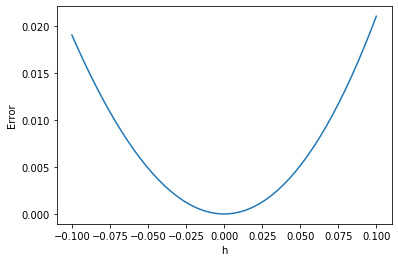

In [9]:
# Define error function proportional to h 

def err(f,fder,x_0,h=0.00001):
    
    return f(x_0+h)-f(x_0)-h*fder(x_0)

# Create linspace for h variable
h = np.linspace(-0.1,0.1,50)

# Plot error function
plt.figure()
plt.plot(h,err(P,Pder,1,h))
plt.xlabel("h")
plt.ylabel("Error")
plt.show()



## Question 6
Reprenez les question 3, 4 et 5 avec d'autres fonctions que le polynome vu en cours. Vous pourrez par exemple essayer des fonctions trigonométriques ou exponentielles.

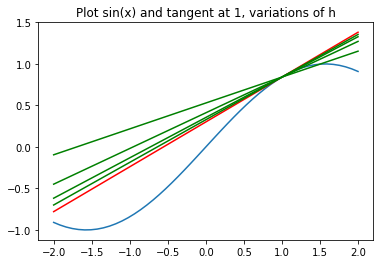

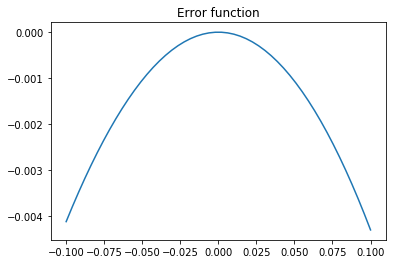

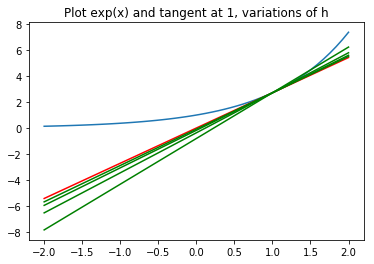

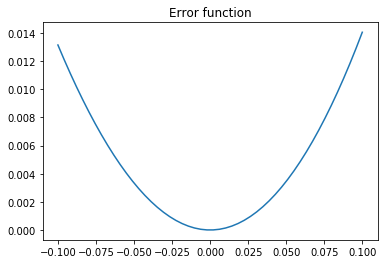

In [50]:
# Repeating questions for  function sin(x), exp(x)

# Set linear space for x variable
x = np.linspace(-2,2)

h=0.5
plt.figure()
plt.title('Plot sin(x) and tangent at 1, variations of h')
plt.plot(x,np.sin(x))
plt.plot(x,tangent_line(np.sin,1,x),'r')
for i in range(1,5):
    plt.plot(x,tangent_line(np.sin,1,x,h),'g')
    h = h * 0.5
plt.show()

h = np.linspace(-0.1,0.1,50)
plt.figure()
plt.title('Error function')
plt.plot(h,err(np.sin,np.cos,1,h))
plt.show()

h=0.5
plt.figure()
plt.title('Plot exp(x) and tangent at 1, variations of h')
plt.plot(x,np.exp(x))
plt.plot(x,tangent_line(np.exp,1,x),'r')
for i in range(1,5):
    plt.plot(x,tangent_line(np.exp,1,x,h),'g')
    h = h * 0.5
plt.show()

h = np.linspace(-0.1,0.1,50)
plt.figure()
plt.title('Error function')
plt.plot(h,err(np.exp,np.exp,1,h))
plt.show()



## Question 6 bis (bonus)
Ecrivez une fonction python qui calcule les valeurs d'un polynome quelconque dont les coefficients seraient données dans un tableau. Indication: utiliser le schéma de Horner.  
Ecrivez aussi une fonction python qui calcule directement les valeurs du polynome dérivé.

In [83]:
def Horner(C,x):
    n=len(C)
    Q=[0]*n
    Q[0]=C[0];
    
    for k in range(1,n):
        Q[k]= Q[k-1]*x+C[k]

    return Q

Pol=[1,-1,0,1]
print(Horner(Pol,1))

# Decreasing series

def der_Pol(C):
    n=len(C)
    t = np.array(range(n-1,0,-1))
    Q=[0]*n
    Q[0]=0;
    
    for k in range(1,n):
        Q[k] = t[k-1]*C[k-1]

    
    Q[n-1]=0;
    return Q

Pol=[1,-1,0,1]
print(der_Pol(Pol))

[1, 0, 0, 1]
[0, 3, -2, 0]


## Question 7
On va chercher ici à représenter la dérivée d'une fonction quelconque à l'aide d'un schéma d'approximation.
On part par exemple de la fonction $sin$ définie sur l'intervalle $[-\pi/2,\pi/2]$ qui sera échantilloné avec un pas $h$ donné.  
Représentez la courbe de $(\sin(x+h)-\sin x)/h$ en fonction de $x$. Superposez la courbe de la fonction $\cos$ sur le même intervalle. Que remarque-t-on?  
Faites varier le pas $h$ et conclure.

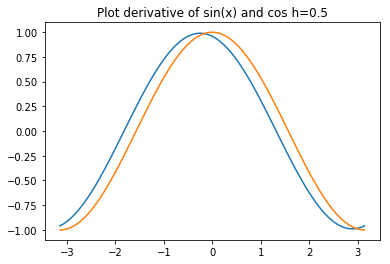

In [61]:
x = np.linspace(-np.pi,np.pi,100)
h = 0.5

plt.figure()
plt.title('Plot derivative of sin(x) and cos h=0.5')
plt.plot(x,deriv(np.sin,x,h))
plt.plot(x,np.cos(x))
plt.show()

# When h-> 0 the two curves coincide



## Question 8
Reprendre la question 7 avec d'autres fonctions, comme par exemple le polynome du cours.

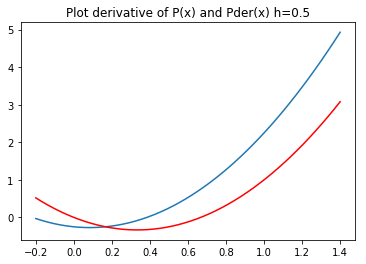

In [64]:
# starting with P

x = np.linspace(-0.2,1.4)
h = 0.5

plt.figure()
plt.title('Plot derivative of P(x) and Pder(x) h=0.5')
plt.plot(x,deriv(P,x,h))
plt.plot(x,Pder(x),'r')
plt.show()


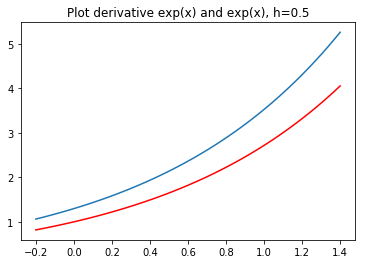

In [65]:

x = np.linspace(-0.2,1.4)
h = 0.5

plt.figure()
plt.title('Plot derivative exp(x) and exp(x), h=0.5')
plt.plot(x,deriv(np.exp,x,h))
plt.plot(x,np.exp(x),'r') 
plt.show()